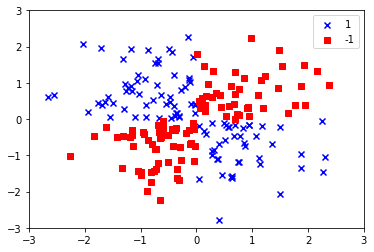

In [9]:
#ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# XORのデータの作成
np.random.seed(0)
X1 = np.random.randn(200, 2)
y1 = np.logical_xor(X1[:, 0] > 0, X1[:, 1] > 0)
y1 = np.where(y1, 1, -1)

# データのプロット
plt.scatter(X1[y1 == 1, 0], X1[y1 == 1, 1], c='b', marker='x', label='1')
plt.scatter(X1[y1 == -1, 0], X1[y1 == -1, 1], c='r', marker='s', label='-1')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best') # 右上に凡例を出力
plt.show()

In [10]:
#ホールドアウト法
from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test=train_test_split=train_test_split(
    X1,y1,test_size=0.3,random_state=0)

In [11]:
#グリッドサーチでの分割方法を指定
from sklearn.model_selection import StratifiedKFold
kf1=StratifiedKFold(n_splits=10,shuffle=True,random_state=0)

In [12]:
#学習方法の指定
from sklearn.svm import SVC

In [13]:
param_grid={"C":[0.1,1.0,10,100,1000,10000],
           "gamma":[0.001,0.01,0.1,1,10]}

In [14]:
#グリッドサーチの実行
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(SVC(),param_grid,cv=kf1)
gs.fit(X1_train,y1_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1.0, 10, 100, 1000, 10000], 'gamma': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

best params:{'C': 100, 'gamma': 0.1}
best socore:0.971429
score:0.983333


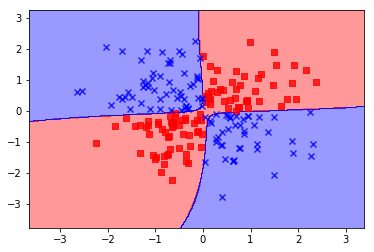

In [18]:
#test精度が最も高かった組み合わせを出力
print("best params:%s"%gs.best_params_)

#その時のtest精度の平均
print("best socore:%f"%gs.best_score_)

#実際のtest精度
print("score:%f"%gs.score(X1_test,y1_test))

#決定曲線を出力する関数を定義
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)
    plt.show()

#決定曲線を出力
plot_decision_regions(X1,y1,gs)